
<h2> Demo 1: Perform K-Fold Cross Validation Using Python </h2>

In this demo, you will learn how to apply K-Fold cross validation to evaluate the model using Python.

## Problem Statement

Details of clients of a wholesale distributor is given along with their region the aim is to classify their region.

# Dataset

<b>Wholesale customer data.csv</b> is the dataset that has details of clients of a wholesale distributor. Annual spending on monetary units (m.u.) on diverse product categories is given along with their region:

- __Fresh__: annual spending (m.u.) on fresh products
- __Milk__: annual spending (m.u.) on milk products
- __Grocery__: annual spending (m.u.)on grocery products
- __Frozen__: annual spending (m.u.)on frozen products
- __Detergents_Paper__: annual spending (m.u.) on detergents and paper products
- __Deliacatessen__: annual spending (m.u.)on and delicatessen products
- __Channel__: Customer Channel - `Horeca (Hotel/Restaurant/Cafe) or Retail channel`
- __Region__: Customer Region - `Lisnon, Oporto or Other`

## Importing Required Libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt

# Data Analysis

<div style="background-color:##EDF9FF">
  <ul><li><h3> Checking Data</h3></li></ul>
</div>

In [2]:
data=pd.read_csv('Wholesale customers data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.shape

(440, 8)

Dataset has 440 rows and 8 columns

<div style="background-color:##EDF9FF">
  <ul><li><h3> Testing For Null Values</h3></li></ul>
</div>

In [5]:
pd.DataFrame({'Count':data.isnull().sum(),'Percentage':data.isnull().sum()/data.shape[0]})

,Count,Percentage
Channel,0,0.0
Region,0,0.0
Fresh,0,0.0
Milk,0,0.0
Grocery,0,0.0
Frozen,0,0.0
Detergents_Paper,0,0.0
Delicassen,0,0.0


Dataset has no null values.

<div style="background-color:##EDF9FF">
  <ul><li><h3> Check Distribution Of Target Variable</h3></li></ul>
</div>

In [6]:
target_ratio=pd.DataFrame({'Counts':data.Region.value_counts(),'Percentage':data.Region.value_counts()/len(data)})
target_ratio

,Counts,Percentage
Region,,
3,316,0.718182
1,77,0.175000
2,47,0.106818


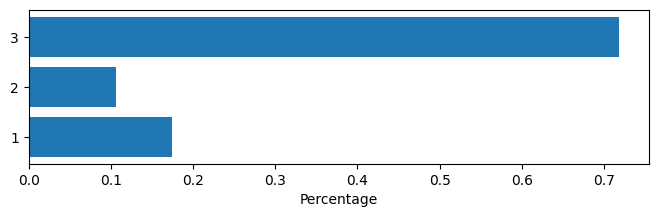

In [7]:
plt.figure(figsize = (8,2))
plt.barh(target_ratio.index, target_ratio.Percentage)
plt.xlabel('Percentage')
plt.show()

<div style="background-color:##EDF9FF">
  <ul><li><h3>Handling Catergorical Features</h3></li></ul>
</div>

In [8]:
data=pd.get_dummies(data,columns=['Channel'])

In [9]:
feat = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

print("Number of features (labels):", len(feat))
print("Shape of the transposed data:", data[feat].T.shape)

Number of features (labels): 6
Shape of the transposed data: (6, 440)


<div style="background-color:##EDF9FF">
  <ul><li><h3>Scaling Features</h3></li></ul>
</div>

In [10]:
# Check for NaN values
print("NaN values in the data:")
print(data[feat].isna().sum())

# Check data types
print("\nData types:")
print(data[feat].dtypes)


NaN values in the data:
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Data types:
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


C:\Users\bdobhalx\AppData\Local\Temp\ipykernel_43776\3907290029.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=feat, vert=False)


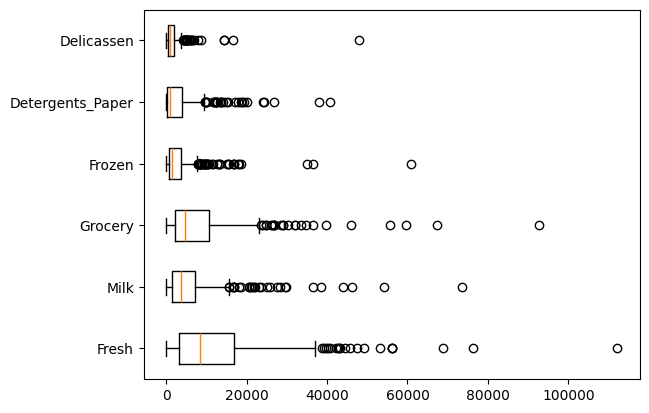

In [11]:
import matplotlib.pyplot as plt

# Your features
feat = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Convert each column to an array and store in a list
data_to_plot = [data[column].values for column in feat]

# Create the boxplot
plt.boxplot(data_to_plot, labels=feat, vert=False)
plt.show()


In [12]:
data[feat]=MinMaxScaler().fit_transform(data[feat])

C:\Users\bdobhalx\AppData\Local\Temp\ipykernel_43776\1462440947.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=feat, vert=False)


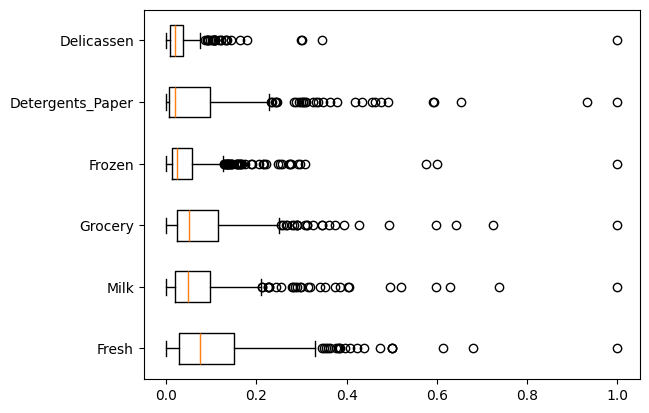

In [13]:
#feat = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Convert each column to an array and store in a list
data_to_plot = [data[column].values for column in feat]

# Create the boxplot with the list of arrays
plt.boxplot(data_to_plot, labels=feat, vert=False)
plt.show()

Keeping outliers as we don't want to miss some valueble information.

<div style="background-color:##EDF9FF">
  <ul><li><h3>New Data</h3></li></ul>
</div>

In [14]:
data.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2
0,3,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,False,True
1,3,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,False,True
2,3,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,False,True
3,3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,True,False
4,3,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,False,True


<div style="background-color:##EDF9FF">
  <ul><li><h3>Selecting Features</h3></li></ul>
</div>

In [15]:
X=data.drop(['Region'],axis=1)
y=data.Region

# K-Fold Cross Validator

Following parameter are avaliable in <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold'>K-Fold Cross Validator</a>:

- __n_splits__:`int`Number of folds by default 5 and minimum value should be 2.

In [16]:
kf=KFold(n_splits=4)
kf.get_n_splits(X,y)

4

In [17]:
clf=DecisionTreeClassifier()
for train_ind, test_ind in kf.split(X,y):
    clf.fit(X.iloc[train_ind,:],y[train_ind])
    pred=clf.predict(X.iloc[test_ind,:])
    print(round(accuracy_score(y[test_ind],pred),3))

0.609
0.509
0.236
0.636


# Cross Validator

Following parameter are avaliable in <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html'>Cross Validator</a>:

- __estimator__:`model` The model to use to fit the data.
- __X__: array-like
- __y__:target variable `optional`
- __cv__:`int`If __None__ then uses 5-fold CV, on using an `int` value uses stratified KFold(Preserves percentage of samples of each class)


In [18]:
cv =cross_val_score(DecisionTreeClassifier(),X,y,cv=4,scoring='accuracy')

In [19]:
cv

array([0.56363636, 0.50909091, 0.51818182, 0.55454545])

*__Conclusion__*: In this demonstration, we have applied K-Fold cross validation to evaluate our model.